## CAM(Class Activation Map)

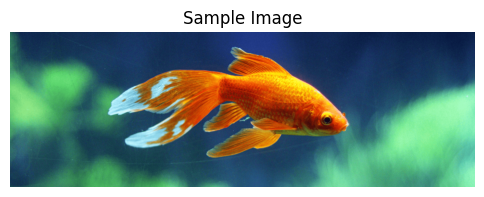

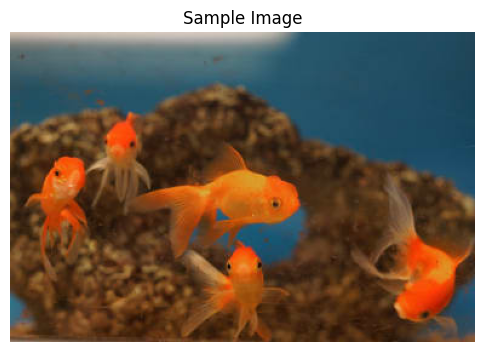

In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


# 이미지 다운로드 및 로드
url_1 = 'https://petmedaily.com/wp-content/uploads/2022/12/Featured-Image-do-goldfish-get-lonely-1536x512.png'
url_2 = 'https://pethelpful.com/.image/w_384,q_auto:good,c_limit/MjEwNDM3MjkyNzE4ODI3MzQ1/easy-ways-to-keep-fish-alive-on-a-fish-bowl-without-air-pump.jpg'
response = requests.get(url_1)
img1 = Image.open(BytesIO(response.content)).convert('RGB')  # 확실한 RGB 변환

response = requests.get(url_2)
img2 = Image.open(BytesIO(response.content)).convert('RGB')  # 확실한 RGB 변환

# 이미지 시각화 (원본 이미지)
plt.figure(figsize=(6,6))
plt.imshow(img1)
plt.axis('off')
plt.title("Sample Image")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img2)
plt.axis('off')
plt.title("Sample Image")
plt.show()

In [2]:
# 이미지 저장 예시
img1.save("img1.png")
img2.save("img2.png")

In [4]:
import torch
from torch import nn
from torchvision import models, transforms
from torch.nn import functional as F
from PIL import Image
import matplotlib.pyplot as plt

# 1. 모델 준비: 사전학습된 ResNet-18 로드 및 평가 모드로 전환
model = models.resnet18(weights="ResNet18_Weights.IMAGENET1K_V1").eval()

# 마지막 두 레이어(fc, avgpool) 제외한 feature extractor 구성
features_extractor = nn.Sequential(*list(model.children())[:-2])

In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
features_extractor

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

weights :  torch.Size([512, 1, 1])
feature map :  torch.Size([512, 7, 7])
cam :  (512, 1536)


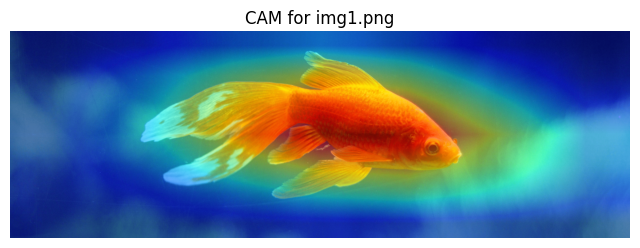




weights :  torch.Size([512, 1, 1])
feature map :  torch.Size([512, 7, 7])
cam :  (256, 384)


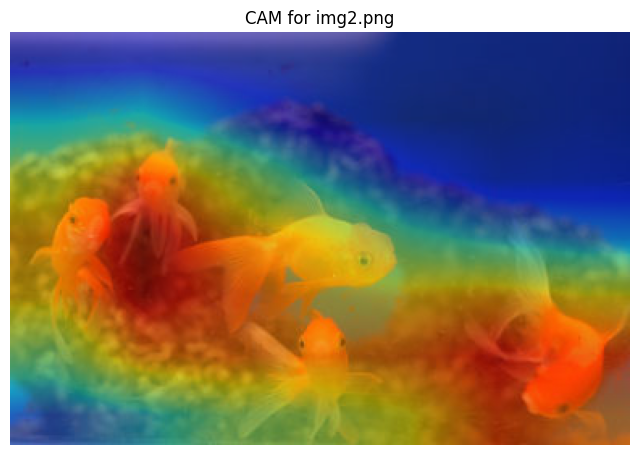

In [ ]:
import torch
from torch import nn
from torchvision import models, transforms
from torch.nn import functional as F
from PIL import Image
import matplotlib.pyplot as plt

# 1. 모델 준비: 사전학습된 ResNet-18 로드 및 평가 모드로 전환
model = models.resnet18(weights="ResNet18_Weights.IMAGENET1K_V1").eval()

# 마지막 두 레이어(fc, avgpool) 제외한 feature extractor 구성
features_extractor = nn.Sequential(*list(model.children())[:-2])

# 2. 이미지 전처리 정의: ResNet 입력에 맞게 사이즈 조정, 텐서 변환, 정규화
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 모델 입력 크기로 조정
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet 평균값
        std=[0.229, 0.224, 0.225]    # ImageNet 표준편차
    ),
])

# 3. 저장된 이미지 파일 경로 리스트 (예: img1.png, img2.png)
image_paths = ["img1.png", "img2.png"]

# 4. 각 이미지에 대해 CAM 계산 및 시각화
for image_path in image_paths:
    # 이미지 로드 및 RGB 변환
    image = Image.open(image_path).convert("RGB")

    # 전처리: 텐서로 변환하고 배치 차원 추가
    target = transform(image).unsqueeze(0)

    # 4-1. 모델 순전파 수행하여 예측 결과 얻기
    output = model(target)
    class_idx = int(output.argmax())

    # 4-2. 예측 클래스에 해당하는 fc 레이어 가중치 추출 및 reshape
    weights = model.fc.weight[class_idx].reshape(-1, 1, 1)
    print('weights : ', weights.shape)

    # 4-3. 마지막 컨볼루션 층의 feature map 추출
    features_output = features_extractor(target).squeeze()
    print('feature map : ', features_output.shape)

    # 4-4. CAM 계산: 각 feature map에 가중치를 곱한 후 합산
    cam = features_output * weights
    cam = torch.sum(cam, dim=0)

    # 4-5. CAM 맵을 원본 이미지 크기로 보간(interpolate)
    cam = F.interpolate(
        input=cam.unsqueeze(0).unsqueeze(0),  # 배치 및 채널 차원 추가
        size=(image.height, image.width),      # 원본 이미지의 (높이, 너비)
        mode="bilinear"
    ).squeeze().detach().numpy()
    print('cam : ', cam.shape)

    # 4-6. 원본 이미지와 CAM 맵 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.imshow(cam, cmap="jet", alpha=0.5)  # CAM 맵 오버레이 (반투명)
    plt.axis("off")
    plt.title(f"CAM for {image_path}")
    plt.show()

    print("\n\n")

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

## Grad-CAM

#### 1. Hook이란?
Hook은 PyTorch에서 모델의 순전파(forward) 또는 역전파(backward) 중 특정 시점에 사용자 정의 함수를 "연결"하여, 그 시점의 입력, 출력 또는 기울기(gradient)를 관찰하거나 수정할 수 있게 해주는 기능입니다.
즉, 모델이 데이터를 처리하는 중간 단계에 "콜백 함수"를 등록하여, 그 정보를 따로 저장하거나 분석할 수 있습니다.

실제 예시
- 순전파 Hook (forward hook):
    - 예를 들어, 여러분이 모델의 특정 레이어가 어떤 특징(feature map)을 출력하는지 보고 싶다면, 그 레이어에 forward hook을 등록할 수 있습니다.
    - 이렇게 하면, 모델이 순전파를 진행할 때 해당 레이어의 출력값을 캡처할 수 있습니다.
- 역전파 Hook (backward hook):
    - 반대로, 역전파를 할 때 각 레이어에 흐르는 기울기(gradient)를 보고 싶다면, backward hook을 등록하여 그 값을 저장할 수 있습니다.
    - Grad-CAM에서는 예측에 영향을 준 중요한 영역을 찾기 위해, 마지막 컨볼루션 레이어에서 계산된 gradient를 활용합니다.


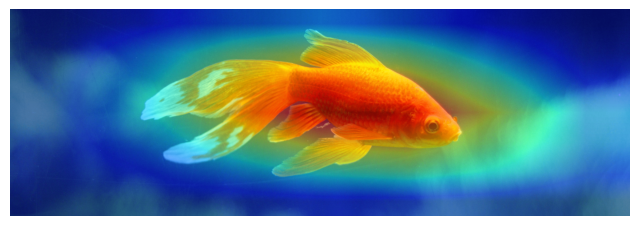

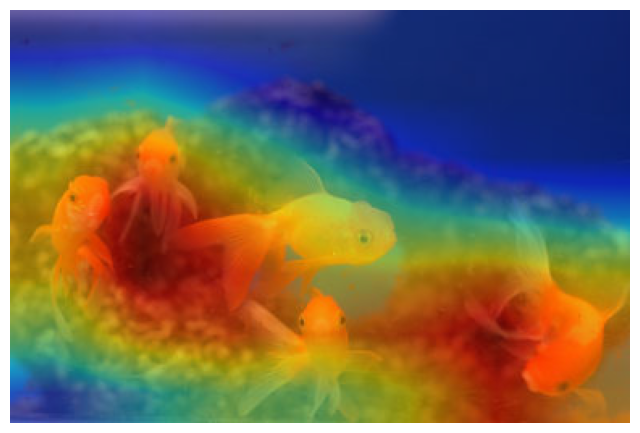

In [ ]:
import torch
from torch.nn import functional as F
from torchvision import models, transforms
from PIL import Image
from matplotlib import pyplot as plt


class GradCAM:
    """
    Grad-CAM 구현 클래스.
    모델의 특정 레이어(주로 마지막 컨볼루션 층)에서 feature map과 gradient를 추출하여,
    해당 feature map이 예측에 기여한 정도를 시각화하는 역할을 합니다.
    """
    def __init__(self, model, main_layer_name, sub_layer_name):
        """
        Args:
            model (torch.nn.Module): 사전학습된 모델.
            main_layer_name (str): hook을 등록할 상위 모듈 이름 (예: "layer4").
            sub_layer_name (str): 상위 모듈 내에서 hook을 등록할 하위 모듈 이름 (예: "conv2").
        """
        self.model = model.eval()  # 모델을 평가 모드로 전환
        self.register_hook(main_layer_name, sub_layer_name)  # 관심 있는 레이어에 hook 등록

    def register_hook(self, main_layer_name, sub_layer_name):
        """
        지정한 모듈의 특정 하위 모듈에 forward 및 backward hook을 등록합니다.
        """
        # 모델의 자식 모듈들을 순회합니다.
        for name, module in self.model.named_children():
            if name == main_layer_name:
                # main_layer_name에 해당하는 모듈 내부에서 마지막 레이어의 자식 모듈들을 순회
                for sub_name, sub_module in module[-1].named_children():
                    if sub_name == sub_layer_name:
                        # forward hook: feature map 저장
                        sub_module.register_forward_hook(self.forward_hook)
                        # backward hook: gradient 저장
                        sub_module.register_full_backward_hook(self.backward_hook)

    def forward_hook(self, module, input, output):
        """
        forward hook: forward 단계에서 해당 모듈의 출력을 저장합니다.
        """
        self.feature_map = output

    def backward_hook(self, module, grad_input, grad_output):
        """
        backward hook: 역전파 단계에서 해당 모듈의 gradient를 저장합니다.

        (참고)
        PyTorch의 backward hook에서는 모듈이 여러 출력을 가질 수 있으므로, gradient 값들이 튜플 형태로 제공됩니다.
        단일 텐서를 출력하는 경우, 그 gradient는 grad_output[0]에 저장
        """
        self.gradient = grad_output[0] # 관심 있는 gradient를 얻기 위해 첫 번째(그리고 유일한) 요소 선택

    def __call__(self, x):
        """
        모델에 입력을 전달하여 Grad-CAM을 계산합니다.

        Args:
            x (torch.Tensor): 입력 이미지 텐서 (배치 형태)

        Returns:
            grad_cam (torch.Tensor): 각 이미지에 대한 Grad-CAM 결과 (공간적 크기: feature map)
        """
        # 모델 순전파를 통해 예측 결과 도출
        output = self.model(x)

        # 예측 클래스 인덱스를 구함 (배치의 각 샘플마다 가장 큰 값을 가진 클래스)
        indices = output.argmax(dim=1)

        # one-hot 인코딩 생성: 각 샘플의 예측 클래스에 해당하는 위치만 1로 설정
        one_hot = torch.zeros_like(output)
        for i in range(output.size(0)):
            one_hot[i, indices[i]] = 1

        # 기울기 계산을 위해 모델의 기울기를 초기화
        self.model.zero_grad()
        # 역전파 수행: one_hot 벡터를 gradient로 사용
        # retain_graph=True를 설정하면, backward 연산 후에도 계산 그래프가 남아있어, 추가적인 역전파 연산이나 후속 연산에서 이 그래프를 활용할 수 있게 됩니다.
        output.backward(gradient=one_hot, retain_graph=True)  # 역전파 실행하여 관심 클래스에 대한 gradient 계산

        # gradient의 공간적 평균을 구하여 각 feature map의 중요도(가중치) 계산
        a_k = torch.mean(self.gradient, dim=(2, 3), keepdim=True)
        # 각 feature map에 가중치를 곱하고, 모든 채널을 합산하여 Grad-CAM 맵 계산
        grad_cam = torch.sum(a_k * self.feature_map, dim=1)
        # ReLU 적용: 음수 값은 제거하여 긍정적인 영향만 반영
        grad_cam = torch.relu(grad_cam)

        return grad_cam


# -------------------- 이미지 전처리 및 Grad-CAM 적용 --------------------

# 이미지 전처리: ResNet 입력에 맞게 이미지 크기 조정, 텐서 변환, 정규화
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet 평균
        std=[0.229, 0.224, 0.225]    # ImageNet 표준편차
    ),
])

# 분석할 이미지 파일 경로 리스트
files = ["img1.png", "img2.png"]

# 이미지와 텐서 리스트 생성
images = []
tensors = []
for file in files:
    image = Image.open(file)
    images.append(image)
    tensors.append(transform(image))

# 배치 형태의 텐서로 스택
tensors = torch.stack(tensors)

# Grad-CAM 객체 생성
# 여기서는 ResNet-18의 "layer4" 모듈의 마지막 블록 내 "conv2" 레이어에 hook을 등록
grad_cam_generator = GradCAM(
    model=models.resnet18(weights="ResNet18_Weights.IMAGENET1K_V1"),
    main_layer_name="layer4",
    sub_layer_name="conv2"
)

# 입력 텐서에 대해 Grad-CAM 계산
grad_cams = grad_cam_generator(tensors)

# 각 이미지에 대해 Grad-CAM 결과 시각화
for idx, image in enumerate(images):
    # Grad-CAM 결과의 해상도를 원본 이미지 크기로 보간(interpolate)
    cam_resized = F.interpolate(
        input=grad_cams[idx].unsqueeze(0).unsqueeze(0),  # 배치 및 채널 차원 추가
        size=(image.size[1], image.size[0]),             # 원본 이미지의 (높이, 너비)
        mode="bilinear",
    ).squeeze().detach().numpy()

    # 원본 이미지와 CAM을 오버레이하여 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.imshow(cam_resized, cmap="jet", alpha=0.5)
    plt.axis("off")
    plt.show()
